======================================================================================

## Team Members:
### Name: Shi Chen

Student ID: 54638177

### Name: Sakthi Thennarasu

Student ID: 64916650

### Date of submission: 04/10/2020


=======================================================================================

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

#### Task: Using Pokemon API to collect 20 Pokemons information

The Pokemon API contains information on the various types of Pokemon

In this task, we are interested in picking up 20 Pokemon names and their weights

#### Step 1: Import libraries

1. Using library httr and json lite to read the API which is in JSON format
2. ggplot2 is used to plot data

In [1]:
# your answer here
library(tidyverse)
library(httr)
library(jsonlite)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.2          v purrr   0.3.4     
v tibble  3.0.3          v dplyr   1.0.2.9000
v tidyr   1.1.2          v stringr 1.4.0     
v readr   1.3.1          v forcats 0.5.0     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'jsonlite'


The following object is masked from 'package:purrr':

    flatten




#### Step 2: Contect with API

In [2]:
PokeAPI = GET("https://pokeapi.co/api/v2/pokemon")
PokeAPI

Response [https://pokeapi.co/api/v2/pokemon]
  Date: 2020-10-04 05:25
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 1.42 kB


#### Step 3: Transform the string from API to data frame
1. Using fromJSON and rawtoChar method to convert the content inside the API to character type
2. names() is used to scroll through the data columns available

In [3]:
Pokedata = fromJSON(rawToChar(PokeAPI$content))

In [4]:
names(Pokedata)

[1] "count"    "next"     "previous" "results"

3. Creating a new dataframe to store the Results from the API

In [5]:
PokemonDF <- Pokedata$results
PokemonDF

,name,url
,<chr>,<chr>
1,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/
2,ivysaur,https://pokeapi.co/api/v2/pokemon/2/
3,venusaur,https://pokeapi.co/api/v2/pokemon/3/
4,charmander,https://pokeapi.co/api/v2/pokemon/4/
5,charmeleon,https://pokeapi.co/api/v2/pokemon/5/
6,charizard,https://pokeapi.co/api/v2/pokemon/6/
7,squirtle,https://pokeapi.co/api/v2/pokemon/7/
8,wartortle,https://pokeapi.co/api/v2/pokemon/8/
9,blastoise,https://pokeapi.co/api/v2/pokemon/9/


#### Step 4: Try one page first 
Looking at one url to understand the data and pick up sample weight for one Pokemon

In [6]:
PokedetailAPI = GET("https://pokeapi.co/api/v2/pokemon/1")
Pokedetaildata = fromJSON(rawToChar(PokedetailAPI$content))


In [7]:
names(Pokedetaildata)

[1] "abilities"                "base_experience"         
 [3] "forms"                    "game_indices"            
 [5] "height"                   "held_items"              
 [7] "id"                       "is_default"              
 [9] "location_area_encounters" "moves"                   
[11] "name"                     "order"                   
[13] "species"                  "sprites"                 
[15] "stats"                    "types"                   
[17] "weight"

In [8]:
Pokedetaildata$weight

[1] 69

#### Step 5: Create a function 

The function will accepts the link as input and fetches the weight from the URL

In [9]:
get_pokemonweight <- function(link){
  
res = GET(link)
data = fromJSON(rawToChar(res$content))
pokeweight = data$weight
  return(pokeweight)
    }

#### Step 6: Using the function and get the output

1. Access the function by passing values from the existing pokemon dataframe. Using map function to map each result to the corresponding observations

In [10]:
PokemonDF <- PokemonDF %>% mutate(weight= map_int(PokemonDF$url,get_pokemonweight))

2. Check the output

In [11]:
PokemonDF

name,url,weight
<chr>,<chr>,<int>
bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,69
ivysaur,https://pokeapi.co/api/v2/pokemon/2/,130
venusaur,https://pokeapi.co/api/v2/pokemon/3/,1000
charmander,https://pokeapi.co/api/v2/pokemon/4/,85
charmeleon,https://pokeapi.co/api/v2/pokemon/5/,190
charizard,https://pokeapi.co/api/v2/pokemon/6/,905
squirtle,https://pokeapi.co/api/v2/pokemon/7/,90
wartortle,https://pokeapi.co/api/v2/pokemon/8/,225
blastoise,https://pokeapi.co/api/v2/pokemon/9/,855


#### Step 7: Using ggplot to visualize

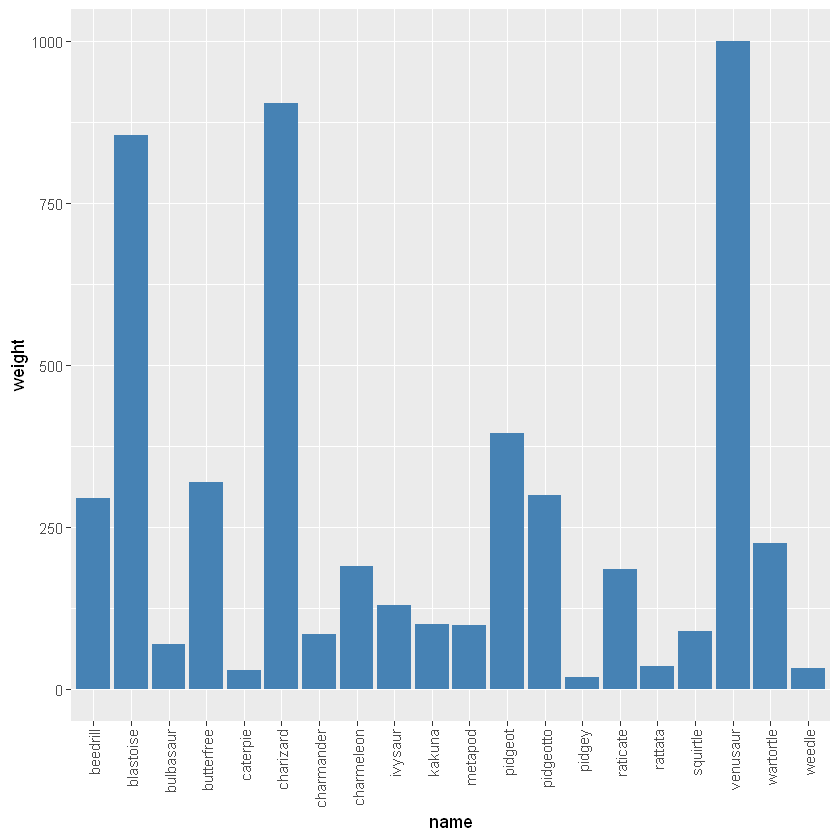

In [12]:
p<-ggplot(data=PokemonDF, aes(x=name, y=weight)) +
  geom_bar(stat="identity" , fill="steelblue") + theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))
p
